In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
def format_with_commas(x):
    return '{:,.3f}'.format(x)

column_nbrcases = 'Nbr. Cases in Pop.'
column_percentcases = 'Percent Prevalence'

pd.options.display.float_format = format_with_commas

ihme_gbd_population_path = 'Resources\Global_Burden_of_Disease\IHME_GBD_2019_POP_2000_2019_0\GBD_Population_Data_2000_2019.csv'
imhe_gbd_depression_path = 'Resources\Global_Burden_of_Disease\IHME_GBD_2019_DEPRESSION_2000_2019_0\GBD_Depression_Data_2000_2019.csv'

ihme_gbd_population = pd.read_csv(ihme_gbd_population_path)
imhe_gbd_depression = pd.read_csv(imhe_gbd_depression_path)

merged_data = pd.merge(ihme_gbd_population, imhe_gbd_depression, on=["Location","Year"], how="inner")
clean_merged_data = merged_data.drop(columns=['Gender_y', 'Age Group_y']) \
                               .rename(columns={'Gender_x': 'Gender', 'Age Group_x': 'Age Group'})

desired_column_order = ['Location', 'Year', 'Age Group', 'Gender', 'Disorder', 'Population', 'Nbr. Cases in Pop.']
reordered_data = clean_merged_data.loc[:, desired_column_order].copy()

reordered_data.loc[:, 'Percent Prevalence'] = ((reordered_data['Nbr. Cases in Pop.'] / reordered_data['Population']) * 100).round(2)
reordered_data_sorted = reordered_data.sort_values(by='Location')

output_csv_path ="Resources/Global_Burden_of_Disease/Population_Vs_Depression.csv"
reordered_data.to_csv(output_csv_path, index=False)


In [3]:
#Checking for missing values
print(reordered_data.isnull().sum())

Location              0
Year                  0
Age Group             0
Gender                0
Disorder              0
Population            0
Nbr. Cases in Pop.    0
Percent Prevalence    0
dtype: int64


In [4]:
#Counting the number of unique locations in the data
unique_locations = reordered_data['Location'].unique()
print(len(unique_locations))

513


In [28]:
#Data Exploration - Basic Statistics and Skewness

nbrcases_mean = reordered_data[column_nbrcases].mean()
nbrcases_median = reordered_data[column_nbrcases].median()
nbrcases_mode = reordered_data[column_nbrcases].value_counts().idxmax()
nbrcases_skewness = reordered_data[column_nbrcases].skew()
nbrcases_min = reordered_data[column_nbrcases].min()  
nbrcases_max = reordered_data[column_nbrcases].max()  

percentcases_mean = reordered_data[column_percentcases].mean()
percentcases_median = reordered_data[column_percentcases].median()
percentcases_mode = reordered_data[column_percentcases].value_counts().idxmax()
percentcases_skewness = reordered_data[column_percentcases].skew()
percentcases_min = reordered_data[column_percentcases].min()
percentcases_max = reordered_data[column_percentcases].max()  

summary_dict = {
    "Number Cases": {
        "Mean": nbrcases_mean,
        "Median": nbrcases_median,
        "Mode": nbrcases_mode,
        "Min": nbrcases_min,
        "Max": nbrcases_max,
        "Skewness": nbrcases_skewness
        
    },
    "Percent Cases": {
        "Mean": percentcases_mean,
        "Median": percentcases_median,
        "Mode": percentcases_mode,
        "Min": percentcases_min,
        "Max": percentcases_max,
        "Skewness": percentcases_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,Number Cases,Percent Cases
Mean,"6,422,607.620",3.920
Median,"48,693.470",4.120
Mode,"63,113,945.730",4.720
Min,34.130,0.320
Max,"279,606,278.700",27.420
Skewness,6.840,0.850


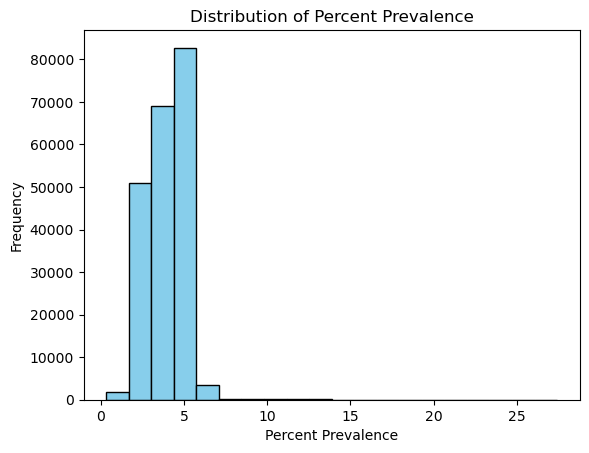

In [5]:
# Create a histogram to visualize the distribution of 'Percent Prevalence'
plt.hist(reordered_data['Percent Prevalence'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Percent Prevalence')
plt.ylabel('Frequency')
plt.title('Distribution of Percent Prevalence')

# Show the plot
plt.show()

In [6]:
#Average Cases by Location Per Year
avg_cases_byregion_year = reordered_data.groupby(["Location", "Year"])[column_nbrcases].mean().round(2)
avg_percent_byregion_year = reordered_data.groupby(["Location", "Year"])[column_percentcases].mean().round(2)


avgdepression_summary_by_regionyear = pd.DataFrame({
    "Average Number of Cases": avg_cases_byregion_year,
    "Average Percent of Prevalence": avg_percent_byregion_year,
})

avgdepression_summary_by_regionyear

Average Number of Cases  Average Percent of Prevalence
Location Year                                                        
Aceh     2000               98,304.710                          2.370
         2001               98,304.710                          2.330
         2002               98,304.710                          2.300
         2003               98,304.710                          2.270
         2004               98,304.710                          2.280
...                                ...                            ...
Ōsaka    2015              231,827.280                          2.580
         2016              231,827.280                          2.580
         2017              231,827.280                          2.590
         2018              231,827.280                          2.590
         2019              231,827.280                          2.600

[10260 rows x 2 columns]

In [17]:
#Highest Percent Prevalence by Country/Year
top_depression_location = avgdepression_summary_by_regionyear.sort_values(by='Average Number of Cases', ascending=False)
top_depression_location.head(5)

Average Number of Cases  Average Percent of Prevalence
Location Year                                                        
Global   2018          244,127,166.430                          3.190
         2000          244,127,166.430                          3.970
         2001          244,127,166.430                          3.920
         2002          244,127,166.430                          3.870
         2003          244,127,166.430                          3.820